In [1]:
!pip install researchpy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

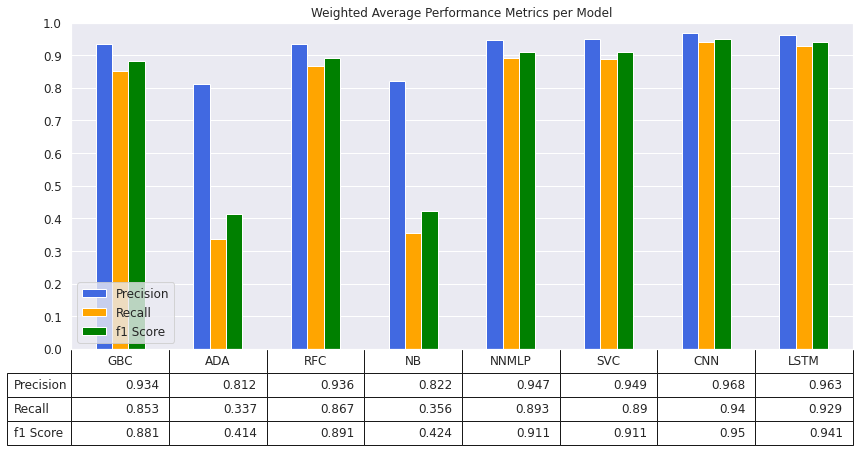

In [3]:
precision = [0.934,0.812,0.936,0.822,0.947,0.949,0.968,0.963]
recall = [0.853,0.337,0.867,0.356,0.893,0.890,0.940,0.929]
f1_score = [0.881,0.414,0.891,0.424,0.911,0.911,0.950,0.941]
index = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score
                  },
                  index=index)
ax = df.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            color={"Precision": "royalblue", "Recall": "orange",'f1 Score':'green'})

h,l = ax.get_legend_handles_labels()
ax.legend(h[:3],["Precision", "Recall", "f1 Score"], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [4]:
import researchpy as rp
rp.summary_cont(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision,8.0,0.9164,0.0625,0.0221,0.8641,0.9686
1,Recall,8.0,0.7581,0.2557,0.0904,0.5443,0.9719
2,f1 Score,8.0,0.7904,0.2304,0.0814,0.5978,0.9830


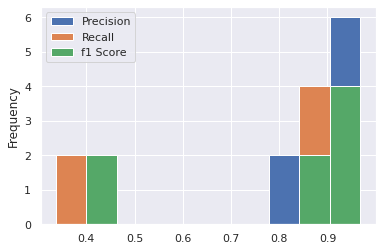

In [5]:
df.plot.hist()

In [6]:
stack_df = df.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'})
display(stack_df)

,models,metric,score
0,GBC,Precision,0.934
1,GBC,Recall,0.853
2,GBC,f1 Score,0.881
3,ADA,Precision,0.812
4,ADA,Recall,0.337
5,ADA,f1 Score,0.414
6,RFC,Precision,0.936
7,RFC,Recall,0.867
8,RFC,f1 Score,0.891
9,NB,Precision,0.822


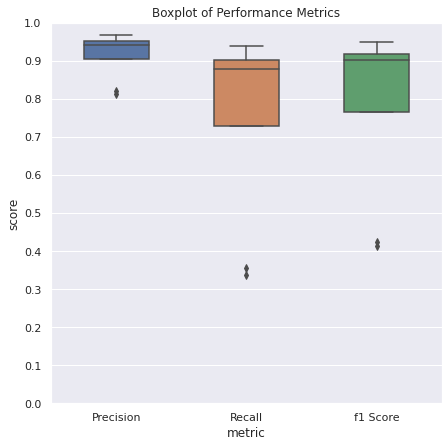

In [7]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5)
ax.set_title('Boxplot of Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [8]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df:
    col_values = df[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.022094712926076093 or s/np.sqrt(n_t) 0.020667711457125575 0.05845711569176159
sample_standard_error s^2= 0.09041223793191461 or s/np.sqrt(n_t) 0.08457290447817786 0.23920829704464683
sample_standard_error s^2= 0.08144848010070098 or s/np.sqrt(n_t) 0.07618807680257456 0.2154924230106479


,metric,mean,std error,CI
1,Recall,0.758125,0.0904122,"(0.54, 0.97)"
2,f1 Score,0.790375,0.0814485,"(0.6, 0.98)"
0,Precision,0.916375,0.0220947,"(0.86, 0.97)"


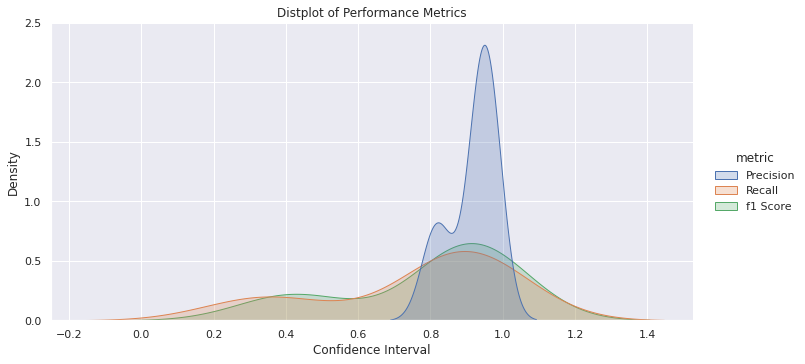

In [9]:
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=True)
plt.title('Distplot of Performance Metrics')
plt.ylim(0,2.5)
plt.xlabel('Confidence Interval')
# graph.ax.legend(labels=['f1 Score','Recall','Precision'],loc=2)
# for CI in CI_df['CI'].values:
#     plt.axvline(CI[0],  linestyle='--')
plt.show()

In [10]:
# Test hypothesis where null hypothesis assume that the sample are taken from Gaussian
# distribution.
# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.
# Shapiro-Wilk test
from scipy.stats import shapiro
for col, val in df.iteritems():
    print(col)
    stat, p = shapiro(val)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# if p > 0.05 we fail to reject null hypoteshsi -> Gaussian
# Extension, see D’Agostino’s K^2 Test or Anderson-Darling Test

Precision
Statistics=0.740, p=0.006
Recall
Statistics=0.671, p=0.001
f1 Score
Statistics=0.657, p=0.001


In [11]:
stats.levene(*[df[i] for i in df.columns])
# if p-value >0.05 non-statistically significant difference in their varability

LeveneResult(statistic=0.8926717962324234, pvalue=0.4245403606035074)

In [12]:
df=df.transpose()

In [13]:
import scipy.stats as stats
F, p = stats.f_oneway(*[df[i] for i in df.columns])
print(f'F= {F}, p={p}')

F= 6.009901382331908, p=0.0014651414952751554


In [14]:
# ANOVA the hard way
# n1 = n2 = n3 
k = len(df.iloc[0]) # Number of columns
list_n = df.count().values
n = np.sum(df.count().values) # Total number of observations

# sum all value from all groups and divide it by sum of observation from all (the three) samples
CM = (df.sum().sum())**2 / n 
# print('CM', CM)
# total SS 
TSS = (df**2).sum().sum() - CM
dof_tss = n - 1

# SST between
SST = ((df.sum()**2).values / list_n).sum() - CM
dof_sst = k - 1
MST = SST / dof_sst 
# SSE within
SSE = TSS - SST
dof_mse = n - k
MSE = SSE / dof_mse

# Test statistic
F = MST/ MSE
# p-value
p = stats.f.sf(F, dof_sst, dof_mse)

# Eta 
et_sq = SST / TSS
# Omega squared 
om_sq = SST - (dof_sst * MSE) / (TSS + MSE)

print('SST', SST, 'dof', dof_sst,'MST', MST)
print('SSE', SSE, 'dof', dof_mse,'MSE', MSE)
print('TSS', TSS, 'dof', dof_tss, 'F', F)
print('p value', p)
print('eta squared', et_sq, 'omega_sqaured', om_sq)

SST 0.7016389583333336 dof 7 MST 0.10023413690476193
SSE 0.2668506666666701 dof 16 MSE 0.016678166666666883
TSS 0.9684896250000037 dof 23 F 6.0099013823318295
p value 0.001465141495275257
eta squared 0.724467191203345 omega_sqaured 0.583134102963306


In [15]:
# CHECK THE RESULTS of DF in analys variance table.
# F stat and pvalue from statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reform the dataframe 
stack_df = df.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'id',
                                    'level_1': 'metric',
                                    0:'score'})
# print(df_2)

mod = ols('score ~ metric', data=stack_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

# et_sq = SST / TSS
et_sq = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('et_sq', et_sq)

            sum_sq    df         F    PR(>F)
metric    0.701639   7.0  6.009901  0.001465
Residual  0.266851  16.0       NaN       NaN
et_sq 0.7244671912033477


In [16]:
# # confidence interval for the difference of one means
# mean0 = df.mean()[0]
# var = MSE
# s = np.sqrt(var)
# # from t distribution at 95% LOC and df = n-k = 15-3 = 12
# t_alpha = 2.179
# CI = t_alpha * s * np.sqrt(1/5)
# print('CI for no breakfast:',  mean0 - CI, mean0 + CI)

# # confidence interval for the difference of two means
# mean1 = df.mean()[1]
# mean2 = df.mean()[2]
# var = MSE
# diff_mean = mean1-mean2
# # from t distribution at 95% LOC and df = n-k = 15-3 = 12
# t_alpha = 2.179
# CI = t_alpha * s *  np.sqrt((1/5) + (1/5))
# print('CI light VS full:',  diff_mean - CI, diff_mean + CI)

In [17]:
# Tukey multi comparison method
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stack_df['score'],
                            stack_df['metric'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   ADA    CNN   0.4317 0.0149  0.0666  0.7968   True
   ADA    GBC   0.3683 0.0472  0.0032  0.7334   True
   ADA   LSTM   0.4233 0.0174  0.0582  0.7884   True
   ADA     NB    0.013    0.9 -0.3521  0.3781  False
   ADA  NNMLP    0.396 0.0287  0.0309  0.7611   True
   ADA    RFC    0.377 0.0404  0.0119  0.7421   True
   ADA    SVC   0.3957 0.0289  0.0306  0.7608   True
   CNN    GBC  -0.0633    0.9 -0.4284  0.3018  False
   CNN   LSTM  -0.0083    0.9 -0.3734  0.3568  False
   CNN     NB  -0.4187 0.0189 -0.7838 -0.0536   True
   CNN  NNMLP  -0.0357    0.9 -0.4008  0.3294  False
   CNN    RFC  -0.0547    0.9 -0.4198  0.3104  False
   CNN    SVC   -0.036    0.9 -0.4011  0.3291  False
   GBC   LSTM    0.055    0.9 -0.3101  0.4201  False
   GBC     NB  -0.3553 0.0595 -0.7204  0.0098  False
   GBC  NNMLP   0.0277    0.9 -0.3374  0.3928 